#                                 #FINDING ACCURACY
                                   USING IPL DATA 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline                  
import warnings                     

In [ ]:
matches=pd.read_csv('D:\machine learning\project\ipl2\matches.csv')
matches.info()
deliveries=pd.read_csv('D:\machine learning\project\ipl\deliveries.csv')
deliveries.info()
deliveries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               570 non-null object
date               577 non-null object
team1              577 non-null object
team2              577 non-null object
toss_winner        577 non-null object
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             574 non-null object
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 81.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            1504

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
matches.head(7)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,4/20/2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,4/20/2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,4/21/2008,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,4/22/2008,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN


In [ ]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,5/21/2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,4/29/2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,5/17/2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [ ]:
matches['winner'].fillna('Draw', inplace=True)

In [ ]:
matches.loc[241,'winner']

'Draw'

In [ ]:
deliveries.loc[241,'over']

19

In [ ]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [ ]:
change = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [ ]:
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,4/19/2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,4/19/2014,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,4/23/2014,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,4/25/2014,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,4/25/2014,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,4/28/2014,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,4/30/2014,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               577 non-null object
date               577 non-null object
team1              577 non-null int64
team2              577 non-null int64
toss_winner        577 non-null int64
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             577 non-null int64
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(9), object(8)
memory usage: 81.2+ KB


In [ ]:
xx=matches.groupby(["toss_winner"]).size()
print(xx.get_value(1))
yy=matches.groupby(["winner"]).size()
print(yy.get_value(1))

74
80


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [ ]:
kumar=change['winner']
print(kumar['MI']) #key value
print(list(kumar.keys())[list(kumar.values()).index(1)])  

1
MI


In [ ]:
matches=matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5


In [ ]:
deliveries=deliveries[['batting_team','bowling_team','batsman','non_striker','bowler','is_super_over','wide_runs','bye_runs']]
deliveries.head(2)

,batting_team,bowling_team,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs
0,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,0
1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,0


In [ ]:
kk= pd.DataFrame(matches)
kk.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


In [ ]:
kuk=pd.DataFrame(deliveries)
kuk.describe()

,is_super_over,wide_runs,bye_runs
count,150460.000000,150460.000000,150460.000000
mean,0.000538,0.037498,0.004885
std,0.023196,0.257398,0.114234
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,5.000000,4.000000


In [ ]:
kk["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur'], dtype=object)

In [ ]:
kk["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [ ]:
kuk["batsman"].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [ ]:
kuk["bowler"].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [ ]:
kuk["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [ ]:
kuk["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [ ]:
ff=kk["city"]
change_data, mapping_index = pd.Series(ff).factorize()
print(change_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  3  1  0  4  2  6  5  7  6  1  3  5
  0  7  3  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  3  8  8  8  8  9 10  8 10  8 10 10  9  8 10
  9 11 10 10 11 11 12 10  9 13  9 13 12 10 10 11 11 11 12 14 14  9 13 14
 11 11 10 10 10 15  9 13 13 15 11 13 10 10 11 11 11 13 13  3  3  1  4  7
 16  0  4  2  0  2 17 16  3 17  7  3  0  1  3 16  1  0 16  3  2  3  7  2
  4  1  7  3  4  2 18  7  5  4  0  1 18  0  2  5 18  3  7  5  7 19  0  4
 19  2  4  3  3  3  3  7  6 20  2  3  4  5  0  1  3  6  5  3  7  6  3  4
 20  2  3  4  1  3  4  2  6  5  7  2  3 20  2  5  0 20  4  5  7  3  2  6
  7  3 20  6  0  4  3  0  1  5  6  1  5  7 21  0  3 19 21  3 19  7  3  3
 19  2  0  4  3  3  7  7  7  4  3  5  0 22  5 23 22  0  2  3  7  1  4  2
 23  4  0  3  5  0  1  6  7  1  7  2  3 17  5 23  1 23  2  7  4  2  3  7
 17  5  0 23  7  4  1  3  0  2 23  6  3  5 23  4  7  5  1  0  4  2  3 19
  2  6 19 23  6  5 23  0  7  7  4  0  6  2  7 23  6

In [ ]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  8  1  0  4  2  6  5  7  6  1  8  5
  0  7  8  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  8  9  9  9  9 10 11  9 11  9 11 11 10  9 11
 10 12 11 11 12 12 13 11 10 14 10 14 13 11 11 12 12 12 13 15 15 10 14 15
 12 12 11 11 11 16 10 14 14 16 12 14 11 11 12 12 12 14 14  8 17  1  4  7
 18  0  4  2  0  2 19 18 17 19  7 17  0  1 17 18  1  0 18  8  2 17  7  2
  4  1  7 17  4  2 20  7  5  4  0  1 20  0  2  5 20 17  7  5  7 21  0  4
 21  2  4  8  8  8  8  7  6 22  2  8  4  5  0  1  8  6  5  3  7  6  8  4
 22  2  3  4  1  3  4  2  6  5  7  2  8 22  2  5  0 22  4  5  7  3  2  6
  7  8 22  6  0  4  3  0  1  5  6  1  5  7 23  0  3 21 23  8 21  7  8  3
 21  2  0  4  3  3  7  7  7  4  3  5  0 24  5 25 24  0  2  3  7  1  4  2
 25  4  0  3  5  0  1  6  7  1  7  2  3 19  5 25  1 25  2  7  4  2  3  7
 19  5  0 25  7  4  1  3  0  2 25  6  3  5 25  4  7  5  1  0  4  2  3 21
  2  6 21 25  6  5 25  0  7  7  4  0  6  2  7 25  6

In [ ]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [ ]:
yu=df['toss_winner'].value_counts(sort=True)
yu2=df['winner'].value_counts(sort=True)
print('No of toss winners by each team')
for idx, val in yu.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in yu2.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 74
KKR -> 69
CSK -> 66
KXIP -> 64
DD -> 64
RR -> 63
RCB -> 61
DC -> 43
SRH -> 30
PW -> 20
KTK -> 8
GL -> 8
RPS -> 7
No of match winners by each team
MI -> 80
CSK -> 79
RCB -> 70
KKR -> 68
KXIP -> 63
RR -> 63
DD -> 56
SRH -> 34
DC -> 29
PW -> 12
GL -> 9
KTK -> 6
RPS -> 5
Draw -> 3


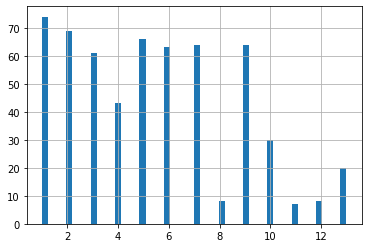

In [ ]:
kk['toss_winner'].hist(bins=50)

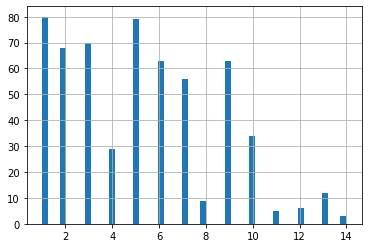

In [ ]:
kk['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match winners')

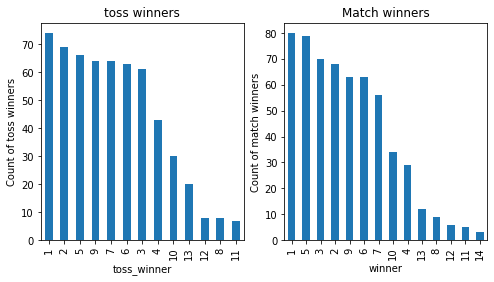

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

Text(0.5, 0.98, '')

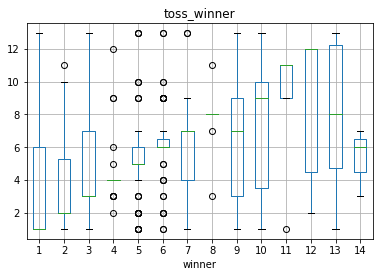

In [ ]:
kk.boxplot(column='toss_winner', by = 'winner') 
plt.suptitle("")

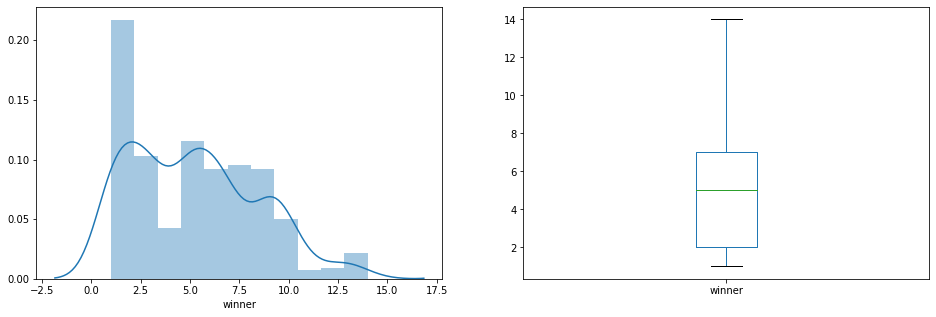

In [ ]:
import seaborn as sns
plt.figure(1) 
plt.subplot(121) 
kuk=kk.dropna() 
sns.distplot(kk['winner']); 
plt.subplot(122) 
matches['winner'].plot.box(figsize=(16,5)) 
plt.show()

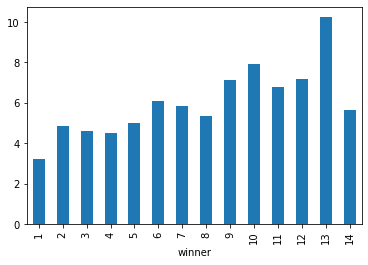

In [ ]:
matches.groupby('winner')['team1'].mean().plot.bar()

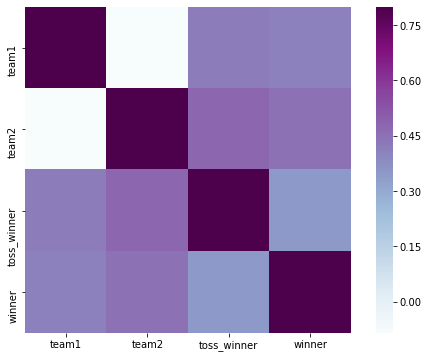

In [ ]:
matrix = matches.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

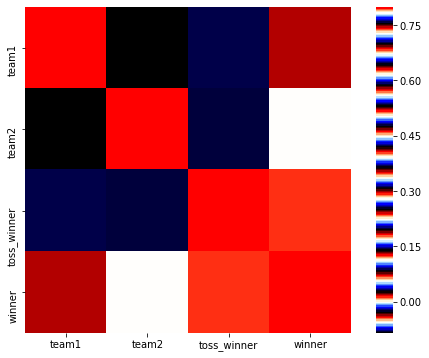

In [ ]:
matrix2 = deliveries.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="flag_r")

In [ ]:
kk.apply(lambda x: sum(x.isnull()),axis=0) 

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [ ]:
 deliveries.apply(lambda x: sum(x.isnull()),axis=0) 

batting_team     0
bowling_team     0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
dtype: int64

In [ ]:
kk[pd.isnull(kk['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    kk[i] = le.fit_transform(kk[i])
kk 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
5,9,6,16,0,9,26,6
6,4,7,14,0,4,23,7
7,5,1,7,1,1,15,5
8,4,6,14,1,6,23,6
9,9,1,6,1,1,22,9


In [ ]:
kk.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
5,9,6,16,0,9,26,6
6,4,7,14,0,4,23,7
7,5,1,7,1,1,15,5
8,4,6,14,1,6,23,6
9,9,1,6,1,1,22,9


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
def classification_model(model, data, predictors, outcome):
        model.fit(data[predictors],data[outcome])
        predictions = model.predict(data[predictors])
        print(predictions)
        accuracy = metrics.accuracy_score(predictions,data[outcome])
        print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

In [ ]:
#logistic Regression
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  5  1  2  6  5  3  3  9  3  5  1  9  5  1  2  6  1  5  1  6  2  5
  3  3  2  9  2  1  3  9  1  6  5  2  1  9  9  1  5  1  1  2  3  2  1  5
  3  3  5  3  2  1  5  6  6  2  3  5  9  5  1  9  5  5  3  5  1  1  5  3
  1  6  1  5  6  6  2  5  1  3  1  1  5  9  5  1  3  6  5  7  2  1  1  2
  1  6  9  5  1  9  1  1  9  5  6  5  2  5  3  6  6  1  1  2  2  9  2  5
  9  5  2  3  3  5  3  3  2  5  9  2  3  9  2  5  5  9  6  1  5  2  5  5
  2  6  5  2  5  5  1  5  6  2  3  5  1  3  5  1  1  2  5  1  5  9  3  2
  9  5  1  2  2  2  2  5  3  6  5 10  2  6  3  9 10  1  1  6  5  6 10  2
  9  5  6  2  9  1  1  9  1  9  9  2 10  7  3  1  3 10  2  9  5  1  9  1
  5  8  9  3  3  2  1  5  9  6  9  9  1  5  9  3  1  9  9  2  5  9  2  1
  3 10  3  1  1  1  1  5  3  2  9  9  3  2  1  6  2  3  3  1  5  9  2  5
  9  2  5  1  5  6  6  5  9  9  5  9  1  2  1  6  6  9  2  5  2  5  1  5
 14  6  3  7  5  7  9  1  3  5  6  9  1  6  6  1  9  9  5  3  1  5  1  9
  3  5  9  9  1  1  1  3  3  5  2  3  9  5  5  6  5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
#Gaussian NAive bayes algorithm
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  5  1  2  6  5 12 12 12  3  5 12  5  5  2 12 12  5  5  5  6 12  6
 12 12 12 12  2 12  3 12  1 12  5  2 12 12 12 12  5 12 12  2  3 12 12  5
 12 12  5  3  2 12  5 12  6 12  3  5 12  5  1 12  5  5  3  5  5  1  6 12
  1  6  2  2  6  6  2  5  1 12  1  1  5 12  5  1  6  6  2 12  5  1 12  5
  1  6 12  5  5 12  1 12 12  6  5  5 12  5 12  5  6 12 12 12  2 12 12  5
  6  3  2 12  3  5 12  5  2  5 12  2  3 12 12  5  5  3  6 12  5 12  5  5
  2  6  5  2  2  5  6  5  6  2  3  3  1  3  5 12 12  2  5  6  5 12  3  2
 12  5  2  2  2  2  2  5 12 13  5 13  2  6  3 12 13 12 12 12  5 12 12 12
 12  5 13 12 12 12 12 12 12 12 12 12 13 12 12 12 12 10 12 12  5 12 12 12
  5 12 12 12 12  2 12  9 10 12  4 12 12  5 12  3  1 12 12 12  5  5 12  1
 12 10  3 12 12 12 12  5 12 12 12 12  3 12 12 13  2  3 12 12  5 12  2  5
 13 12  5 12  5 10  6  5 12 12  5 12  1 12 12 13  3 13 12  6  2  5 12  5
  4  6 12  1  5  2  5 12  3  5 13 12 12 12 12  2 12 10  5  3 12  7 12 12
 12  5 12  1 12  5  1  3 12  5 12  3 12  5  3 13  5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


[ 3  5  5  1  2  6  7  5  6  9  3  5  1  9  3  1  3  9  6  5  4  2  1  6
  9  5  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  2  1  5  3  5  9  5
  9  1  5  3  2  6  3  6  1  6  1  1  7  4  4  2  4  7  2  3  3  2  7  3
  1  5  4  9  5  5  1  3  5  3  2  4  5  4  3  2  5  5  7  2  4  1  4  4
  3  1  3  4  3  9  1  4  3  7  4  3  2  3  7  3  2  4  4  1  1  9  1  3
  6  3  2  1  3  7  4  6  1  4  5  1  3  9  1  6  1  3  6  1  2  1  5  7
  2  2  5  1  2  2  4  5  6  2  3  1  4  3  9  6  4  1  5  6  5  4  1  2
  4  4  2  1  3  2  5  2  6  3  2 13  2  6  1  9 13  4  6  1  5  9  4  2
  4  4  1  2  9  1  3  9  1  6  5  3  2  3  3  6  3  4  2  6  5  1 10  1
  5  2  2  6  9  2  1  3 10  6 10  9  2  5  9  3  4  9  6  2  7  5  2  1
  4  9  3  1  5  1  1  5  5  6  9  6  3  1  6 13  1  3  7  1  5  9  2  4
 13  2  3  1  6  3  2  7  5  9  5  7  1  2  6  6  1  3  7  9  2  7  1  2
  4  6  9  2  5  2  5  1  3  2  6 10  1  6  3  2  5  6  9  1  1  7  1  4
  3  3  9  2  4  6  2  1  5  2  2  1 10  5  5 13 10

In [ ]:
kk.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7


In [ ]:
from sklearn import svm
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 3  5  6  1  2  6  7  5  6  9  6  5  1  9  5  1  3  9  6  5  3  9  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  6  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  5  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
  5  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  6 13  9  6  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  5  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  9  7  5  9  5 13  1  2  6  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  6  2  5  5  2  2  1 10  6  1  9 10

In [ ]:
#Gradient boost algorithm
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0)
classification_model(model, df,predictor_var,outcome_var)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 3  5  6  1  2  6  7  5  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  4  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  9  4  7  9  4
  1  6  3  9  7  5  1  9  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  7  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2 14  6  1  2  1  5  7
  2  3  5  1  9  7  6  5  6  2  4  9  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  2  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  5  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  6 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 14  5  1  5  1  3  5  5  7 13  6  3  5  6 13  1  3  7  1  5  9  2  4
 13  2  6  1  6  3  2  7  5  9  5 13  1  2  6  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  3  5  3  2  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  6  1 13 10

In [ ]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  6  1  2  6  7  1  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  5 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  1  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  3  5 13  1  2  3  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  6  1  9 10

In [ ]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


[ 3  5  7  3  2  6  7  5  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  9  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  7  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  5  7  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  5  6  2  3  9  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  2  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  9  5  1  3 13  6 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  5  7 13  6  3  5  6 13  1  3  7  1  5  9  2  4
 13  2  6  1  6  3  2  7  5  3  5 13  1  2  6 13  1  4  7  9  2  7  1  2
  4  7  9  1  5  2  6  1  3  2  6  9  1  5  3  2  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  7  1 13 10

In [ ]:
kk.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2


In [ ]:
test=pd.read_csv("D:/machine learning/project/ipl2/test.csv")
test.head()

,team1,team2,city,toss_winner,venue,toss_decision,date,winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR
2,KKR,MI,3,MI,3,0,5-May,MI
3,CSK,MI,7,CSK,7,1,7-May,MI
4,DC,CSK,22,CSK,24,1,10-May,CSK


In [ ]:
test=test.drop(["date","winner"], axis=1,inplace=False)

In [ ]:
test.replace(encode, inplace=True)
test.head(2)

,team1,team2,city,toss_winner,venue,toss_decision
0,9,1,3,1,3,0
1,10,6,5,6,5,0


In [ ]:
out=model.predict(test)

In [ ]:
out

array([1, 6, 1, 5, 5], dtype=int64)

In [ ]:
predicted_winner=[]
for i in out:
    predicted_winner.append(list(dicVal.keys())[list(dicVal.values()).index(i)])

In [ ]:
predicted_winner

['MI', 'RR', 'MI', 'CSK', 'CSK']

In [ ]:
print()
print("Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city")
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print()
print(imp_input)


Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city

team2            0.250095
team1            0.205930
toss_winner      0.176994
venue            0.173876
city             0.158289
toss_decision    0.034816
dtype: float64


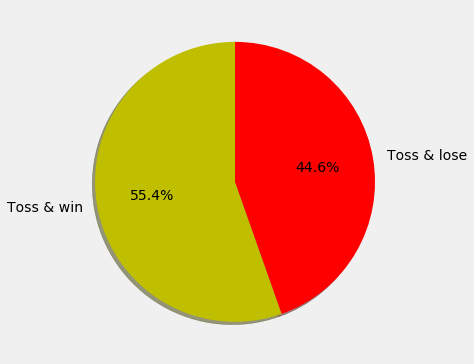

In [ ]:
count =0
for i in range(577): 
    if kk["toss_winner"][i]==kk["winner"][i]==1 :
        count=count+1
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
kk2=kk[kk['toss_winner']==1]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['y','r'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

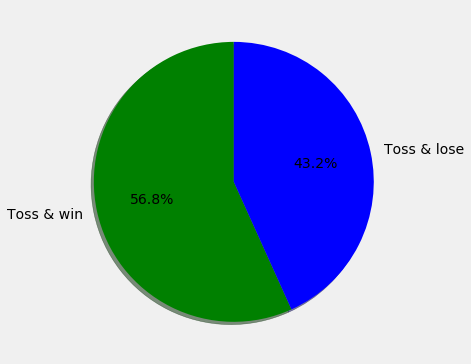

In [ ]:
count =0
for i in range(577): 
    if kk["toss_winner"][i]==kk["winner"][i]==5 :
        count=count+1
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
kk2=kk[kk['toss_winner']==1]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

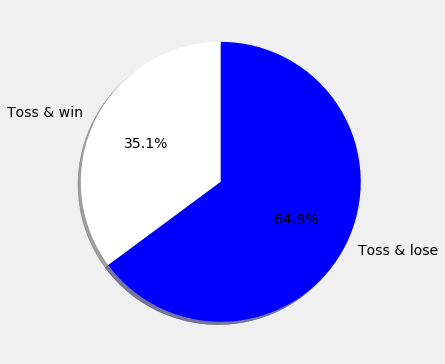

In [ ]:
count =0
for i in range(577): 
    if kk["toss_winner"][i]==kk["winner"][i]==9 :
        count=count+1
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
kk2=kk[kk['toss_winner']==1]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['w','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

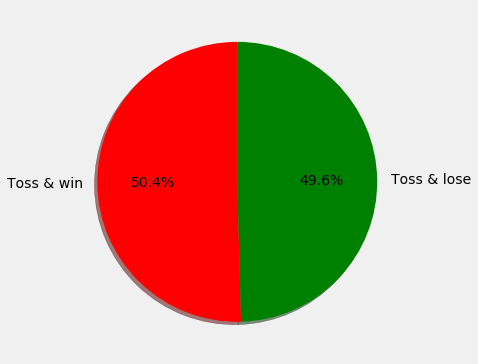

In [ ]:
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
kk2=kk[kk['toss_winner']==kk['winner']]
slices=[len(df_fil),(577-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

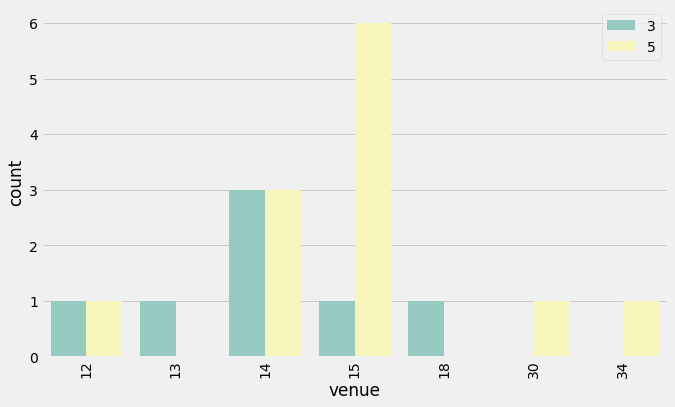

'MA Chidambaram Stadium, Chepauk'

In [ ]:
import seaborn as sns
team1=dicVal['CSK']
team2=dicVal['RCB']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set3')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()
le.classes_[15] 

# random forest is best fit algorithm
            accuracy FINDING 89.801%
            